<a href="https://colab.research.google.com/github/Muluken1Walle/Predicting-Employee-Attrition/blob/main/Predicting_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#sample_data = pd.read_csv('/content/drive/MyDrive/Predicting Employee Attrition/sample_submission.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Predicting Employee Attrition/train_data.csv')
#test_data = pd.read_csv('/content/drive/MyDrive/Predicting Employee Attrition/test_data.csv')

In [ ]:
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [ ]:
train_data.shape

(19104, 13)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [ ]:
train_data.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
train_data['Dateofjoining'] = pd.to_datetime(train_data['Dateofjoining'])
train_data['LastWorkingDate'] = pd.to_datetime(train_data['LastWorkingDate'])

In [ ]:
train_data['Year_of_join'] = train_data['Dateofjoining'].apply(lambda t:t.year)
train_data['Month_of_join'] = train_data['Dateofjoining'].apply(lambda t:t.month)
train_data['Day_of_join'] = train_data['Dateofjoining'].apply(lambda t:t.day)
train_data['Year_of_leave'] =train_data['LastWorkingDate'].apply(lambda t:t.year)
train_data['Month_of_leave'] =train_data['LastWorkingDate'].apply(lambda t:t.month)

In [ ]:
train_data['Attrition'] = np.nan

In [ ]:
train_data =train_data.astype({'Year_of_join':int,'Month_of_join':int,'Day_of_join':int})

In [ ]:
train_data['Attrition']=np.where(train_data['LastWorkingDate'].isnull(),0,1)

In [ ]:
train_data.drop(columns='LastWorkingDate',inplace=True)

In [ ]:
train_data.head(3)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,2381060,2,2015,12,24,NaN,NaN,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,-665480,2,2015,12,24,NaN,NaN,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,0,2,2015,12,24,2016.0,3.0,1


In [ ]:
train_data.drop(columns='Dateofjoining',inplace=True)

In [ ]:
train_data.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Joining Designation', 'Designation', 'Total Business Value',
       'Quarterly Rating', 'Year_of_join', 'Month_of_join', 'Day_of_join',
       'Year_of_leave', 'Month_of_leave', 'Attrition'],
      dtype='object')

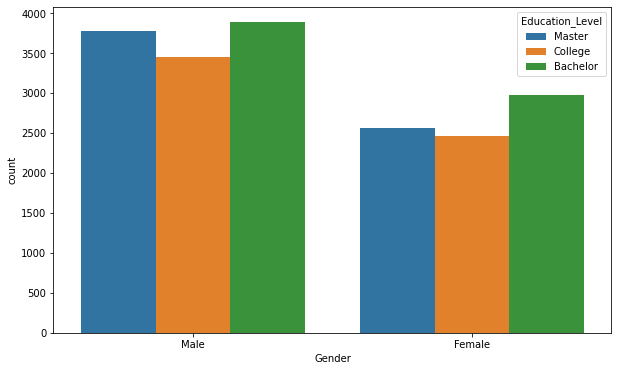

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_data,x='Gender',hue='Education_Level')

In [ ]:
NewEmployee = train_data.groupby(by=['Year_of_join','Month_of_join']).count()['Emp_ID'].unstack()

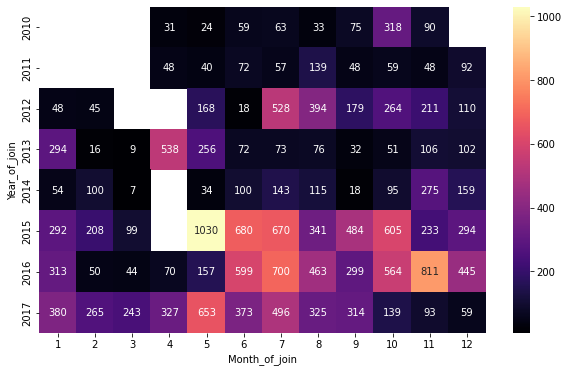

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(NewEmployee,annot=True,fmt='.4g',cmap='magma')

In [ ]:
train_data['Attrition'].value_counts()

0    17488
1     1616
Name: Attrition, dtype: int64

In [ ]:
leaverEmployee =train_data.groupby(by=['Year_of_leave','Month_of_leave']).count()['Emp_ID'].unstack()

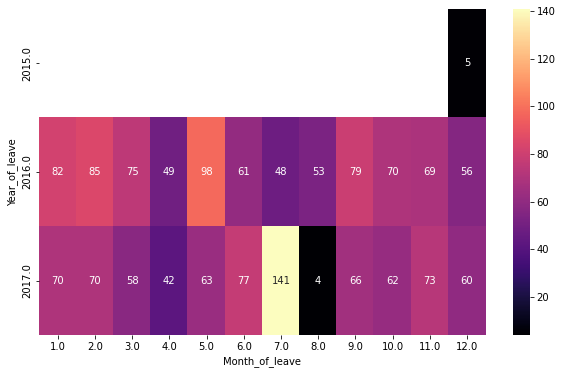

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(leaverEmployee,annot=True,fmt='.4g',cmap='magma')

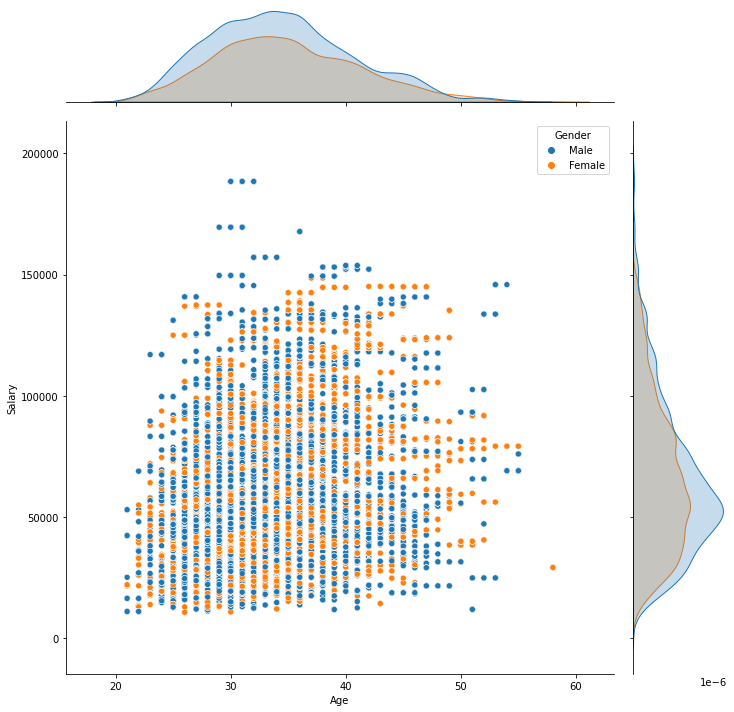

In [ ]:
sns.jointplot(data=train_data,x='Age',y='Salary',hue='Gender',height=10)

<Figure size 720x432 with 0 Axes>

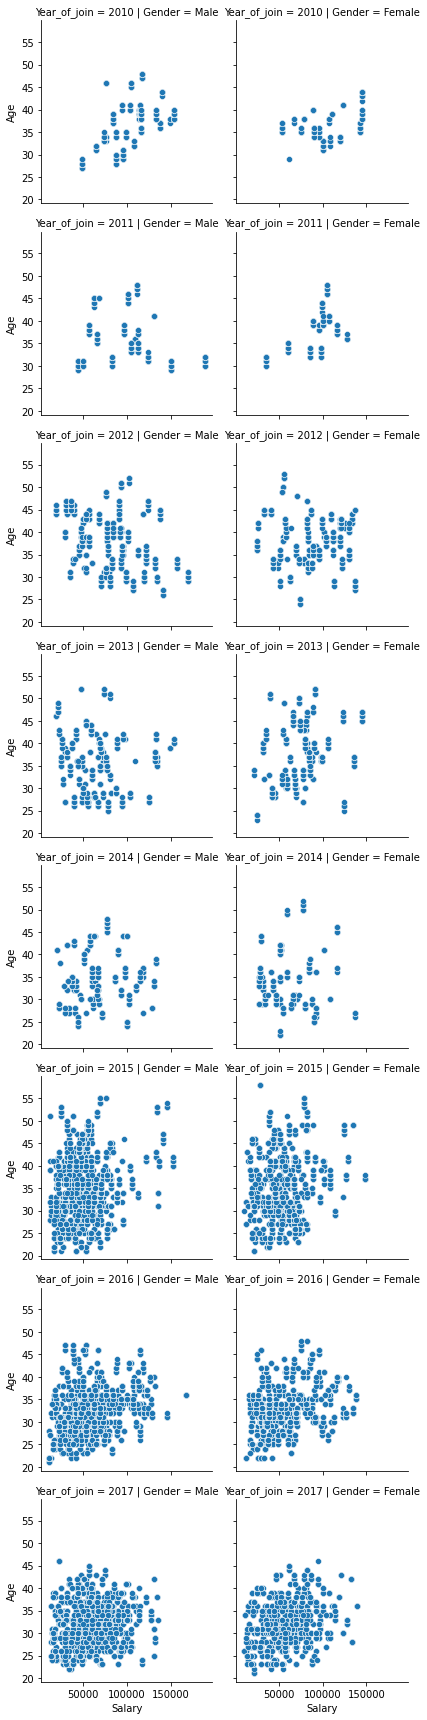

In [ ]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(train_data, col="Gender",  row='Year_of_join')
fg.map(sns.scatterplot, "Salary", "Age")

In [ ]:
train_data.groupby(by=['Education_Level','Gender','Attrition','City']).count()['Emp_ID'].unstack()

City                               C1  C10  C11  C12  C13  C14  C15  C16  C17  \
Education_Level Gender Attrition                                                
Bachelor        Female 0          131   58  170   74   84   48   90  118   73   
                       1            6    8    7    4    4    9    7    8    6   
                Male   0          186  127   66  186   91  108  244  148   87   
                       1            8   13    8   11   12   15   14    8    9   
College         Female 0           75   99   17   84   68   70   83   76   30   
                       1            9   12    3    7    7    5   12    7    6   
                Male   0           55  147   42  141  145  125   45  165   90   
                       1           10    8    6    9   11   11   14   14   12   
Master          Female 0           59   99   44   77   21   79   58   61   64   
                       1           14    6    7   10    8    7    7    5   11   
                Male   0          115  153   84  112  102  160  172   91   41   
                       1            9   14   14   12   16   11   15    8   11   

City                              C18  ...  C27  C28  C29   C3   C4   C5   C6  \
Education_Level Gender Attrition       ...                                      
Bachelor        Female 0          132  ...  119  109  190   52   69   45  106   
                       1           11  ...   16    7   10    9    6    3    8   
                Male   0           43  ...  110  140  132   92   93  156   78   
                       1            8  ...   11   14    9    7   13    8    8   
College         Female 0           52  ...  136   37   89  121   58   88   83   
                       1            5  ...    8    8    1   11    5    8   14   
                Male   0           86  ...  137  128  123   77   77   88  135   
                       1            8  ...   12   10   11    9   13    7    8   
Master          Female 0           74  ...  124   78   71  139  103   66  103   
                       1            4  ...    4    4    7    8    7   11    8   
                Male   0          113  ...  100  132  244  104  126  165  100   
                       1            8  ...    9   16   13    8    8   11    9   

City                               C7   C8   C9  
Education_Level Gender Attrition                 
Bachelor        Female 0           60  162  114  
                       1           10    6    7  
                Male   0          143   68  114  
                       1           13    8   13  
College         Female 0           93  103   34  
                       1            9   10   10  
                Male   0           68   76   36  
                       1            5   18   10  
Master          Female 0           61  166   63  
                       1            7    7    7  
                Male   0          132   84  106  
                       1            8    4    6  

[12 rows x 29 columns]

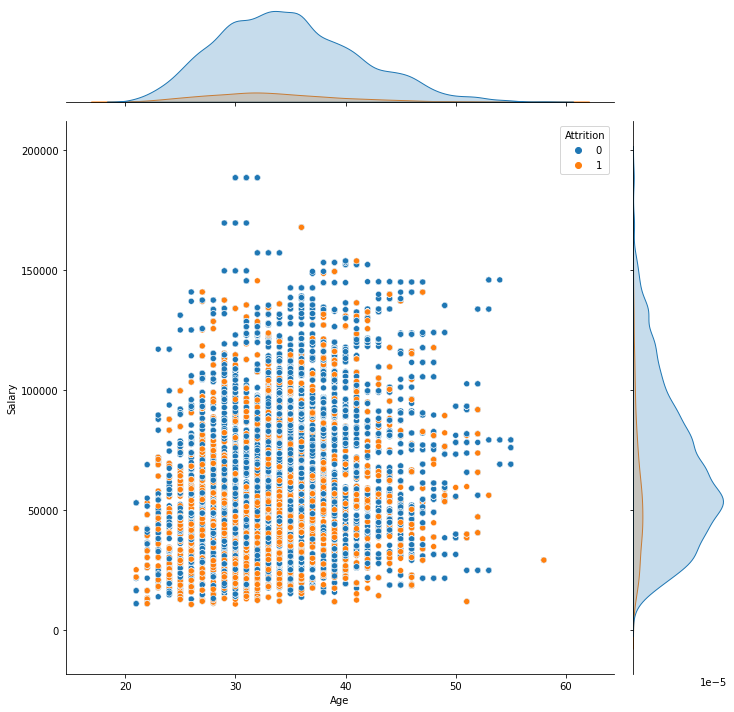

In [ ]:
sns.jointplot(data=train_data,x='Age',y='Salary',hue='Attrition',height=10)

In [ ]:
train_data['Length_of_work'] = train_data['Year_of_leave'] - train_data['Year_of_join']


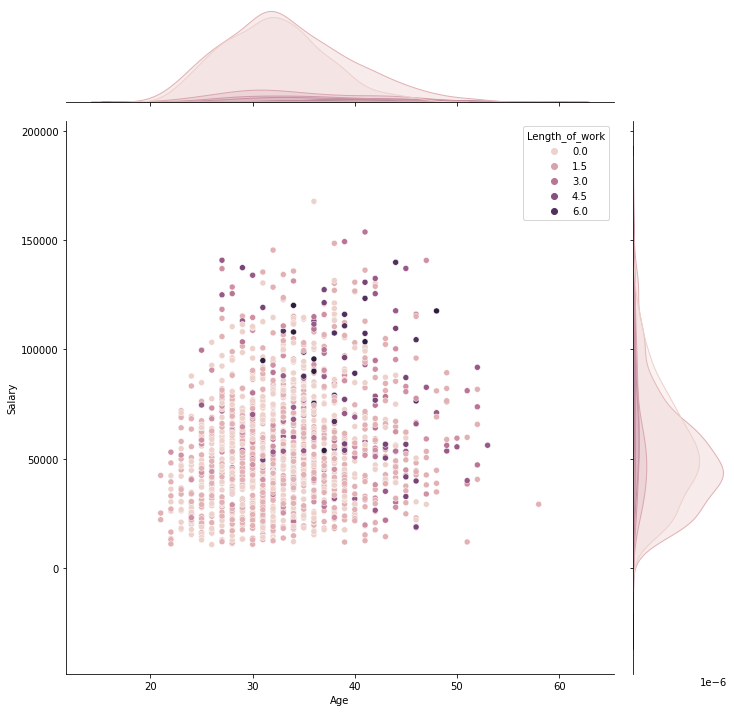

In [ ]:
sns.jointplot(data=train_data,x='Age',y='Salary',hue='Length_of_work',height=10)

<Figure size 720x432 with 0 Axes>

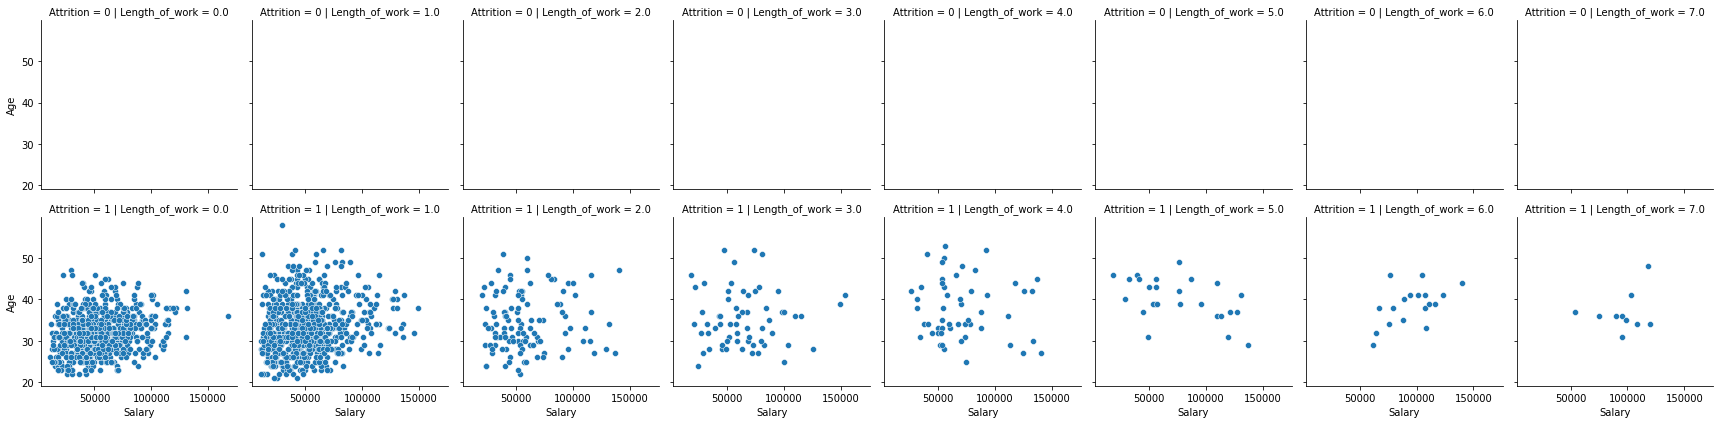

In [ ]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(train_data, col="Length_of_work",  row='Attrition')
fg.map(sns.scatterplot, "Salary", "Age")

<Figure size 720x432 with 0 Axes>

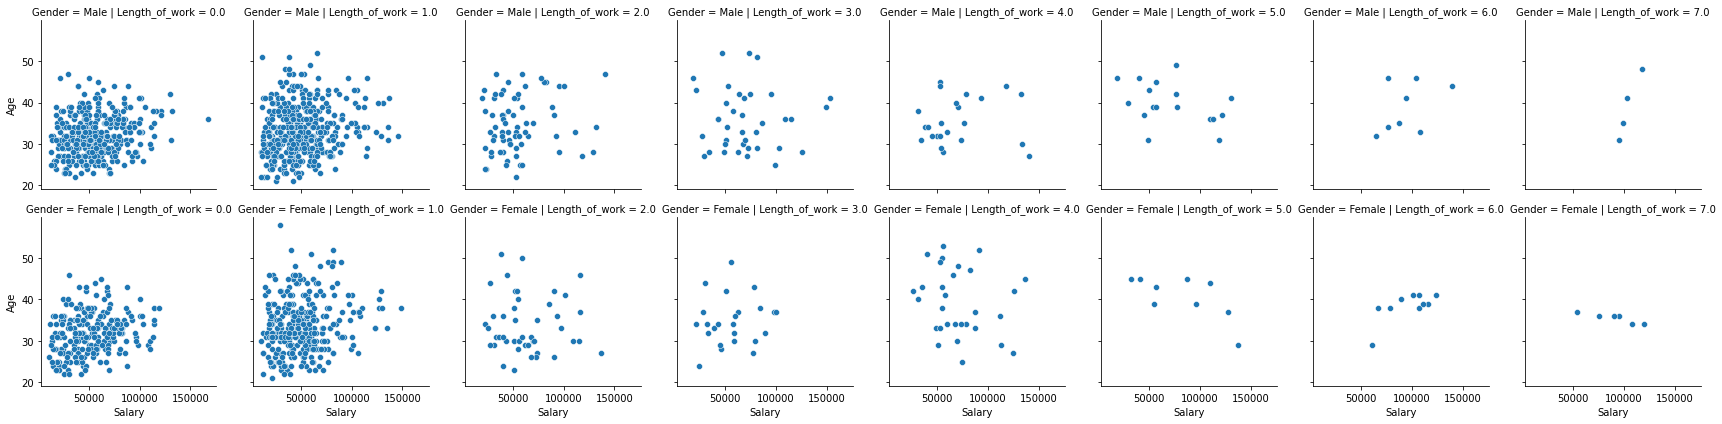

In [ ]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(train_data, col="Length_of_work",  row='Gender')
fg.map(sns.scatterplot, "Salary", "Age")

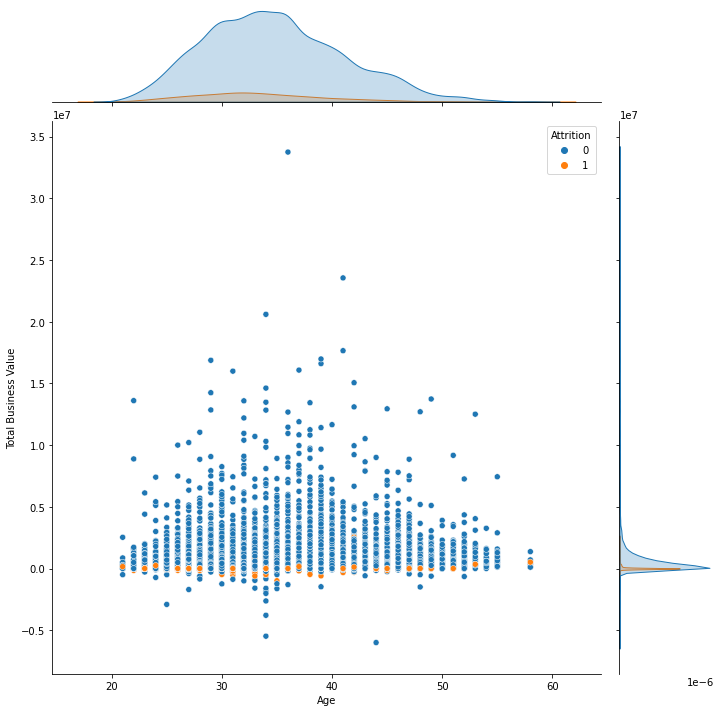

In [ ]:
sns.jointplot(data=train_data,x='Age',y='Total Business Value',hue='Attrition',height=10)

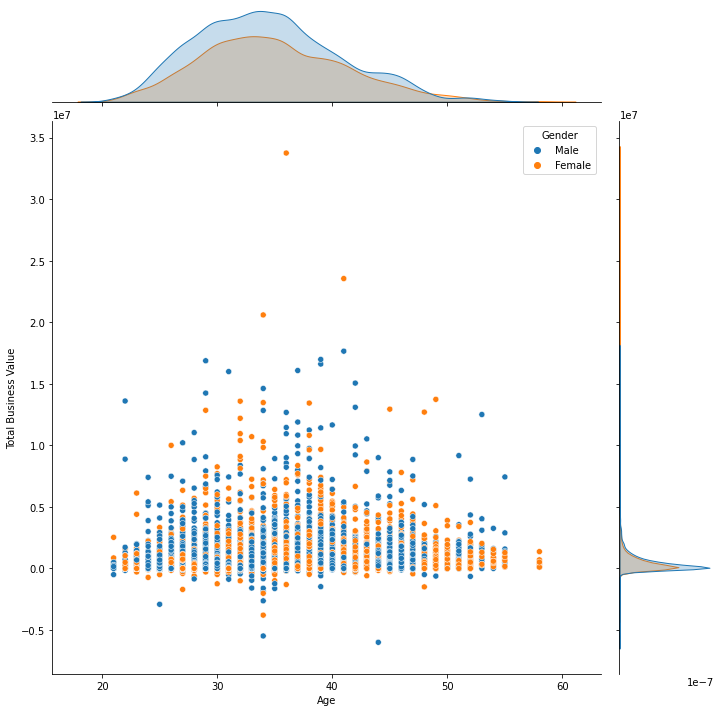

In [ ]:
sns.jointplot(data=train_data,x='Age',y='Total Business Value',hue='Gender',height=10)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Emp_ID                19104 non-null  int64  
 2   Age                   19104 non-null  int64  
 3   Gender                19104 non-null  object 
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  object 
 6   Salary                19104 non-null  int64  
 7   Joining Designation   19104 non-null  int64  
 8   Designation           19104 non-null  int64  
 9   Total Business Value  19104 non-null  int64  
 10  Quarterly Rating      19104 non-null  int64  
 11  Year_of_join          19104 non-null  int64  
 12  Month_of_join         19104 non-null  int64  
 13  Day_of_join           19104 non-null  int64  
 14  Year_of_leave         1616 non-null   float64
 15  Month_of_leave     

In [ ]:
train_data.head(1)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Attrition,Length_of_work
0,2016-01-01,1,28,Male,C23,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0,NaN


In [ ]:
train_data = pd.get_dummies(train_data,columns=['Gender','City',"Education_Level"])


In [ ]:
train = train_data.copy()

In [ ]:
train.head(1)

,MMM-YY,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,2016-01-01,1,28,57387,1,1,2381060,2,2015,12,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train.drop(columns=['MMM-YY','Emp_ID','Joining Designation','Designation',
                    'Year_of_leave','Month_of_leave','Length_of_work'],inplace=True)

In [ ]:
x = train.drop('Attrition',axis=1)
y = train['Attrition']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       19104 non-null  int64
 1   Salary                    19104 non-null  int64
 2   Total Business Value      19104 non-null  int64
 3   Quarterly Rating          19104 non-null  int64
 4   Year_of_join              19104 non-null  int64
 5   Month_of_join             19104 non-null  int64
 6   Day_of_join               19104 non-null  int64
 7   Attrition                 19104 non-null  int64
 8   Gender_Female             19104 non-null  uint8
 9   Gender_Male               19104 non-null  uint8
 10  City_C1                   19104 non-null  uint8
 11  City_C10                  19104 non-null  uint8
 12  City_C11                  19104 non-null  uint8
 13  City_C12                  19104 non-null  uint8
 14  City_C13                  19104 non-nu

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15283 entries, 15131 to 7638
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       15283 non-null  int64
 1   Salary                    15283 non-null  int64
 2   Total Business Value      15283 non-null  int64
 3   Quarterly Rating          15283 non-null  int64
 4   Year_of_join              15283 non-null  int64
 5   Month_of_join             15283 non-null  int64
 6   Day_of_join               15283 non-null  int64
 7   Gender_Female             15283 non-null  uint8
 8   Gender_Male               15283 non-null  uint8
 9   City_C1                   15283 non-null  uint8
 10  City_C10                  15283 non-null  uint8
 11  City_C11                  15283 non-null  uint8
 12  City_C12                  15283 non-null  uint8
 13  City_C13                  15283 non-null  uint8
 14  City_C14                  15283 non

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression()

In [83]:
LR_pred = LR.predict(x_test)
LR_pred

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
y_test

10863    0
4274     0
15470    0
7759     0
479      0
        ..
14362    0
7408     0
12700    0
17441    0
2506     0
Name: Attrition, Length: 3821, dtype: int64

In [82]:
from sklearn.metrics import classification_report
predictions= LR.predict(x_test)
print(predictions)
print()
print(classification_report(y_test,predictions))

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3519
           1       0.12      0.00      0.01       302

    accuracy                           0.92      3821
   macro avg       0.52      0.50      0.48      3821
weighted avg       0.86      0.92      0.88      3821



In [ ]:
confusion_matrix(y_test,predictions)

array([[3512,    7],
       [ 301,    1]])

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions,normalize='all'),annot=True)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,LR_pred))
print("Root Mean Squared Error",rmse)
print("Accuracy",LR.score(x_test,y_test))
print('r2 score',r2_score(y_test,LR_pred))

In [87]:
compare=pd.DataFrame({'y_test':y_test,"predictions":LR_pred})
compare

,y_test,predictions
10863,0,0
4274,0,0
15470,0,0
7759,0,0
479,0,0
...,...,...
14362,0,0
7408,0,0
12700,0,0
17441,0,0
